# 모두를 위한 딥러닝 시즌2
## Lab-03 Liner Regression and How to minimize cost

$$
Hypothesis : W(x) = Wx\\
    cost   : cost(W) = \frac{1}{m}\sum_{i=1}^{m}(Wx_i-y_i)^2
$$

### Cost function in pure python

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1,2,3])
Y = np.array([1,2,3])

def cost_func(W,X,Y):
    c = 0
    for i in range(len(X)):
        c += (W * X[i] - Y[i]) ** 2 # error를 누적합
    return c / len(X) # error 누적합의 평균값을 리턴

for feed_W in np.linspace(-3,5,num=15): # linspace: -3과 5사이 구간을 15개 구간으로 나누어 feed_W에 대입
    curr_cost = cost_func(feed_W, X, Y) # feed_W 값에 따라 cost 값을 curr_cost에 업데이트.
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


### Cost function in Tensorflow

In [7]:
X = np.array([1,2,3])
Y = np.array([1,2,3])

def cost_func(W,X,Y):
    hypothesis = X * W
    return tf.reduce_mean(tf.square(hypothesis - Y))

W_values = np.linspace(-3, 5, num=15) # 위와 같이 구간을 나누어 준다.
cost_values = []

for feed_W in W_values:
    curr_cost = cost_func(feed_W, X, Y) # feed_W 값에 따라 cost 값을 curr_cost에 업데이트.
    cost_values.append(curr_cost)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


* append(x)\
append는 덧붙인다는 뜻으로 괄호( ) 안에 값을 입력하면 새로운 요소를 array 맨 끝에 객체로 추가한다. 요소를 추가할 때는 객체로 추가하게 되는데, 입력한 값이 리스트와 같은 반복 가능한 iterable 자료형이더라도 객체로 저장한다.\
<p>
* np.array([])\
    넘파이의 array 함수에 리스트를 넣으면 ndarray 클래스 객체 즉, 배열로 변환해 준다. 리스트와 비슷해 보이지만 type 명령으로 자료형을 살펴보면 ndarray임을 알 수 있다. 만들어진 ndarray 객체의 표현식(representation)을 보면 바깥쪽에 array()란 것이 붙어 있을 뿐 리스트와 동일한 구조처럼 보인다. 그러나 배열 객체와 리스트 객체는 많은 차이가 있다. 우선 리스트 클래스 객체는 각각의 원소가 다른 자료형이 될 수 있다. 그러나 배열 객체 객체는 C언어의 배열처럼 연속적인 메모리 배치를 가지기 때문에 모든 원소가 같은 자료형이어야 한다. 이러한 제약사항이 있는 대신 원소에 대한 접근과 반복문 실행이 빨라진다.

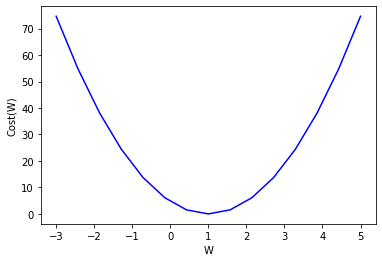

In [8]:
import matplotlib.pyplot as plt

plt.plot(W_values, cost_values, "b")
plt.ylabel('Cost(W)')
plt.xlabel('W')
plt.show()

Tensorflow를 이용한 cost를 구하는 과정은 python 이용한 것과 동일하다.\
하지만, Tensorflow에서 제공하는 함수(tf.reduce_mean, tf.squre)을 이용해 더 편리하게 구성할 수 있다.

### Gradient descent
$$
cost(W) = \frac{1}{m}\sum_{i=1}^{m}(Wx_i - y_i)^2\\
W := W - \alpha\frac{1}{m}\sum_{i=1}^{m}(Wx_i - y_i)x_i
$$

 gradient에 해당하는 $\frac{1}{m}\sum_{i=1}^{m}(Wx_i - y_i)x_i$에 learning rate $\alpha$를 곱한값을 빼준다. 그 값을 새로운 Weight값에 업데이트해준다.

In [12]:
tf.random.set_seed(0) # for reproducibility 다음에 이 부분의 코드를 구현할 때 동일하게 동작하도록

x_data = [1,2,3,4]
y_data = [1,2,3,4]

W = tf.Variable(tf.random.normal([1], -100, 100)) # 정규분포를 따르는 random number를 할당.

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))
    
    # gradient descent
    alpha = 0.01 # learning rate inintialize
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W,X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 10 ==0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(step, cost.numpy(), W.numpy()[0]))

    0 | 11716.3086 |  48.767971
   10 |  4504.9126 |  30.619968
   20 |  1732.1364 |  19.366755
   30 |   666.0052 |  12.388859
   40 |   256.0785 |   8.062004
   50 |    98.4620 |   5.379007
   60 |    37.8586 |   3.715335
   70 |    14.5566 |   2.683725
   80 |     5.5970 |   2.044044
   90 |     2.1520 |   1.647391
  100 |     0.8275 |   1.401434
  110 |     0.3182 |   1.248922
  120 |     0.1223 |   1.154351
  130 |     0.0470 |   1.095710
  140 |     0.0181 |   1.059348
  150 |     0.0070 |   1.036801
  160 |     0.0027 |   1.022819
  170 |     0.0010 |   1.014150
  180 |     0.0004 |   1.008774
  190 |     0.0002 |   1.005441
  200 |     0.0001 |   1.003374
  210 |     0.0000 |   1.002092
  220 |     0.0000 |   1.001297
  230 |     0.0000 |   1.000804
  240 |     0.0000 |   1.000499
  250 |     0.0000 |   1.000309
  260 |     0.0000 |   1.000192
  270 |     0.0000 |   1.000119
  280 |     0.0000 |   1.000074
  290 |     0.0000 |   1.000046
